In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [52]:
# df = house_prices
df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Verilerinizi eğitim ve test kümelerine ayırın.

In [53]:
Y = df["SalePrice"]
X = df[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","YearBuilt","YearRemodAdd"]]

Şimdi, verilerimizi eğitim ve test kümelerine ayırıyoruz. Bunu yaparken scikit-learn'in train_test_split() metodunu kullanacağız. Bu metod, özellikleri ve hedefi olduğu gibi, test boyutunu ve rasgele durum parametrelerini de girdi olarak alır. train_test_split() metodu, verilerin ne kadarının test olarak ayrılacağına karar vermek için test_size parametresini kullanır. Aşağıda, bu parametreyi 0,2 olarak ayarladık. Bu, test kümesi olarak verilerin %20'sini kullanacağımız anlamına gelir.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


# Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.

train_test_split() metodu ile eğitim ve test kümelerindeki özelliklerimiz sırasıyla X_train ve X_test'e, hedefler de y_train ve y_test'e atanmıştır. Şimdi, önceki modellerimizden birini kullanıyoruz ancak bu sefer sadece eğitim kümesini kullanarak eğitiyoruz:

In [55]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     433.9
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        19:58:48   Log-Likelihood:                -13951.
No. Observations:                1168   AIC:                         2.792e+04
Df Residuals:                    1158   BIC:                         2.797e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.086e+06   1.43e+05     -7.577      0.000   -1.37e+06   -8.05e+05
OverallQual   1.978e+04   1340.280     14.757      0.000    1.71e+04    2.24e+04
GrLivArea       49.2806      3.442     14.318      0.000      42.527      56.034
GarageCars    1.221e+04   3443.272      3.547      0.000    5457.393     1.9e+04
GarageArea      15.9217     11.557      1.378      0.169      -6.752      38.596
TotalBsmtSF     13.2358      4.637      2.855      0.004       4.139      22.333
1stFlrSF        14.3391      5.358      2.676      0.008       3.827      24.852
FullBath     -4421.0825   2950.099     -1.499      0.134   -1.02e+04    1367.055
YearBuilt      270.8496     55.308      4.897      0.000     162.335     379.364
YearRemodAdd   243.9851     70.870      3.443      0.001     104.936     383.034
==============================================================================
Omnibus:                      414.071   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41946.899
Skew:                          -0.624   Prob(JB):                         0.00
Kurtosis:                      32.332   Cond. No.                     4.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-kare değeri yüksek, model uygun.

# Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.

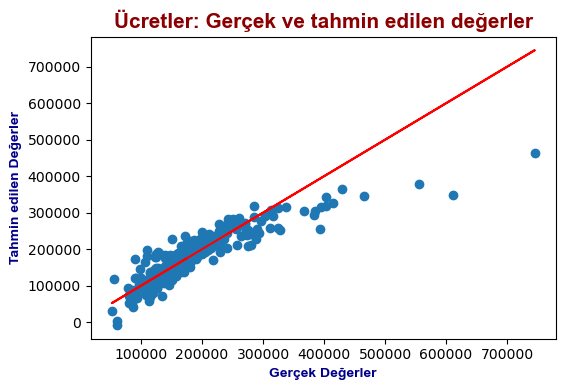

Ortalama Mutlak Hata (MAE)        : 25986.626215711243
Ortalama Kare Hata (MSE)          : 1630647014.1921663
Kök Ortalama Kare Hata (RMSE)     : 40381.270586649036
Ortalama Mutlak Yüzde Hata (MAPE) : 15.080801892296833


In [56]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# Modelinizin performansı tatmin edici mi? Açıklayın.

Düşük ev fiyatları için tahmin performansı daha iyi olduğu gözükmektedir.

# Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

Yeni parametrelri ekleyelim.

In [73]:
Y2 = df["SalePrice"]
X2 = df[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","YearBuilt","YearRemodAdd",
        "TotRmsAbvGrd","Fireplaces","LotArea"]]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [75]:
X_train = sm.add_constant(X_train)

sonuclar2 = sm.OLS(y_train, X_train).fit()

sonuclar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     345.0
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        20:03:03   Log-Likelihood:                -13924.
No. Observations:                1168   AIC:                         2.787e+04
Df Residuals:                    1155   BIC:                         2.794e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.179e+06   1.41e+05     -8.350      0.000   -1.46e+06   -9.02e+05
OverallQual   1.979e+04   1333.446     14.840      0.000    1.72e+04    2.24e+04
GrLivArea       37.6706      4.736      7.953      0.000      28.378      46.964
GarageCars    9521.8417   3402.959      2.798      0.005    2845.167    1.62e+04
GarageArea      22.5859     11.424      1.977      0.048       0.171      45.001
TotalBsmtSF     12.9382      4.568      2.833      0.005       3.976      21.900
1stFlrSF         8.1650      5.320      1.535      0.125      -2.272      18.602
FullBath     -3317.4194   2926.766     -1.133      0.257   -9059.792    2424.954
YearBuilt      281.2830     54.258      5.184      0.000     174.828     387.738
YearRemodAdd   280.3748     69.575      4.030      0.000     143.867     416.883
TotRmsAbvGrd  2137.6485   1225.639      1.744      0.081    -267.080    4542.377
Fireplaces    8820.0974   2007.149      4.394      0.000    4882.030    1.28e+04
LotArea          0.5591      0.108      5.177      0.000       0.347       0.771
==============================================================================
Omnibus:                      409.791   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48855.370
Skew:                          -0.547   Prob(JB):                         0.00
Kurtosis:                      34.665   Cond. No.                     2.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sonuç: 

Adj R-kare değerei bir miktar yükseldi.